## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [18]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
def get_data(data_path: str):
    data = pd.read_csv(data_path)  
    return data

In [ ]:
data = get_data(data_path = "./motorbike_ambulance_calls.csv")


In [55]:
data.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [22]:
data.min()

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

In [23]:
data.max()

index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [24]:
data.shape

(17379, 15)

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [25]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [26]:
data.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1.  Колонка yr має лише 2 значення: 0 та 1, відповідно до першого та другого року. Година в 24-годинному форматі. Holiday колонка має значення 0 та 1, відповідно позначаючи false і true. Weathersit - значення від 0 до 4 вказують наскільки погані погодні умови, 0 будучи найкращими, а 4 - найгіршими. Temp -  вказує на темпаратуру, зведену до проміжку. Atemp - від 0 до 1 вказує на те, як відчувається темпаратура.   
2. Не враховуючи змінну index у нас 14 колонок, з яких 12 - числові. 
3. В даному датасеті немає пропущених значень в жодній з колонок.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [27]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name], format='%m/%d/%y')
  return df
  
dataset = tranform_date(data, 'date')


In [28]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day - {first_day}.\nLast day - {last_day}")
    
get_time_limits(data, 'date')

First day - 2011-01-01 00:00:00.
Last day - 2012-12-31 00:00:00


Відомо, що працюю з даними від 1 січня 2011 року, до 31 грудня 2012 року.

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [29]:
data_categorical = ['season', 'yr', 'weekday', 'hr', 'workingday', 'weathersit', 'holiday', 'mnth']
data_categorical = data[data_categorical].copy()




**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [30]:
season_to_numeric = {"spring": 0, "summer": 1, "autumn": 2, "winter": 3}

def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = dataset[season_col_name].map(season_to_numeric)
  return df
  
data = encode_season(dataset, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

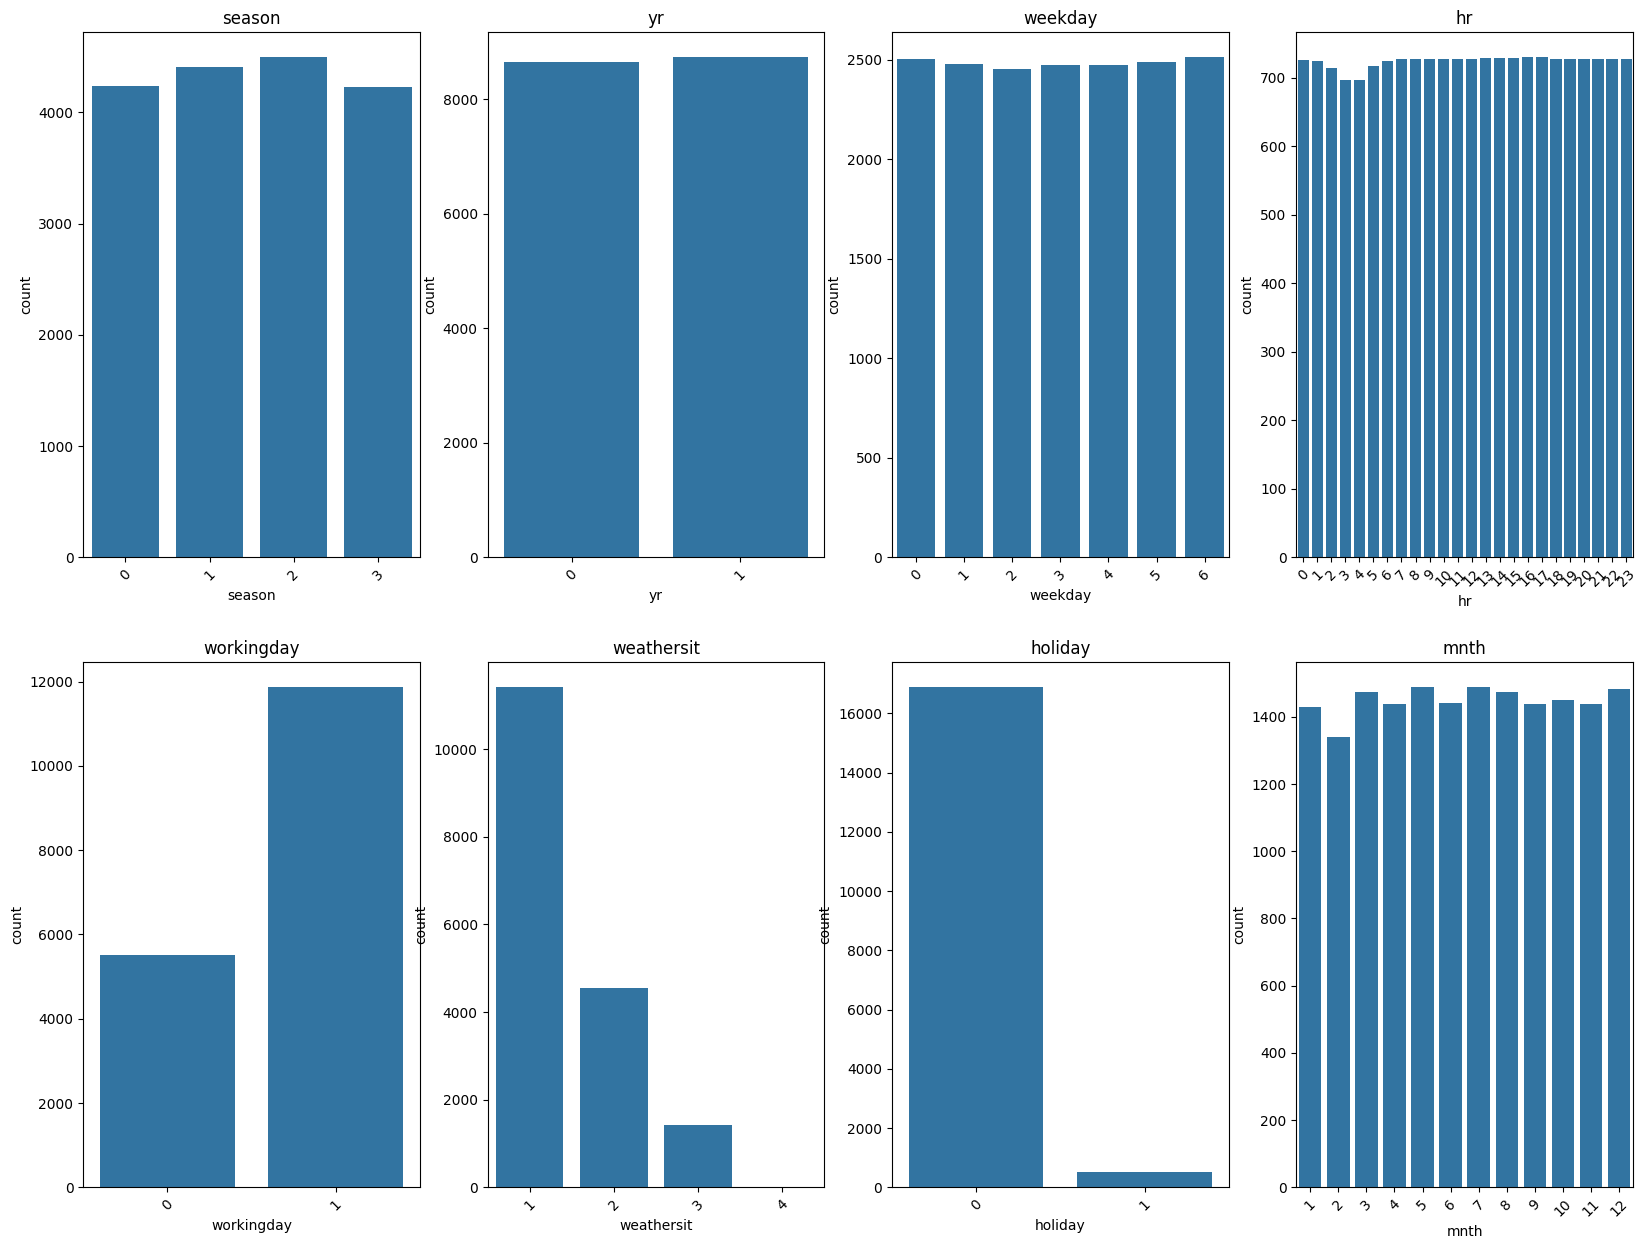

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(20, 15))
for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(x=variable, data=data, ax=subplot)
    subplot.set_title(f'{variable}')
    subplot.tick_params(axis='x', rotation=45)  

plt.show()

**Висновки з 5-7 завдання (детальні)**


1. більшість колонок категоріальні. 
2. Немає прямого звʼязку між кількістю аварій та порою року/ аварій та місяцем.
3. Більше аварій в робочий день, але робочих днів загалом більше тому я думаю, що це не вказує ні на що.
3. Чим гірша погода тим менша кількість аварій

**Завдання 8** виділити числові змінні в окремий датасет

In [32]:
data_numerical = ['atemp', 'temp', 'hum', 'windspeed', 'cnt']
data_numerical = data[data_numerical]

In [33]:
print(data_numerical.head(11))

     atemp  temp   hum  windspeed  cnt
0   0.2879  0.24  0.81     0.0000   16
1   0.2727  0.22  0.80     0.0000   40
2   0.2727  0.22  0.80     0.0000   32
3   0.2879  0.24  0.75     0.0000   13
4   0.2879  0.24  0.75     0.0000    1
5   0.2576  0.24  0.75     0.0896    1
6   0.2727  0.22  0.80     0.0000    2
7   0.2576  0.20  0.86     0.0000    3
8   0.2879  0.24  0.75     0.0000    8
9   0.3485  0.32  0.76     0.0000   14
10  0.3939  0.38  0.76     0.2537   36


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

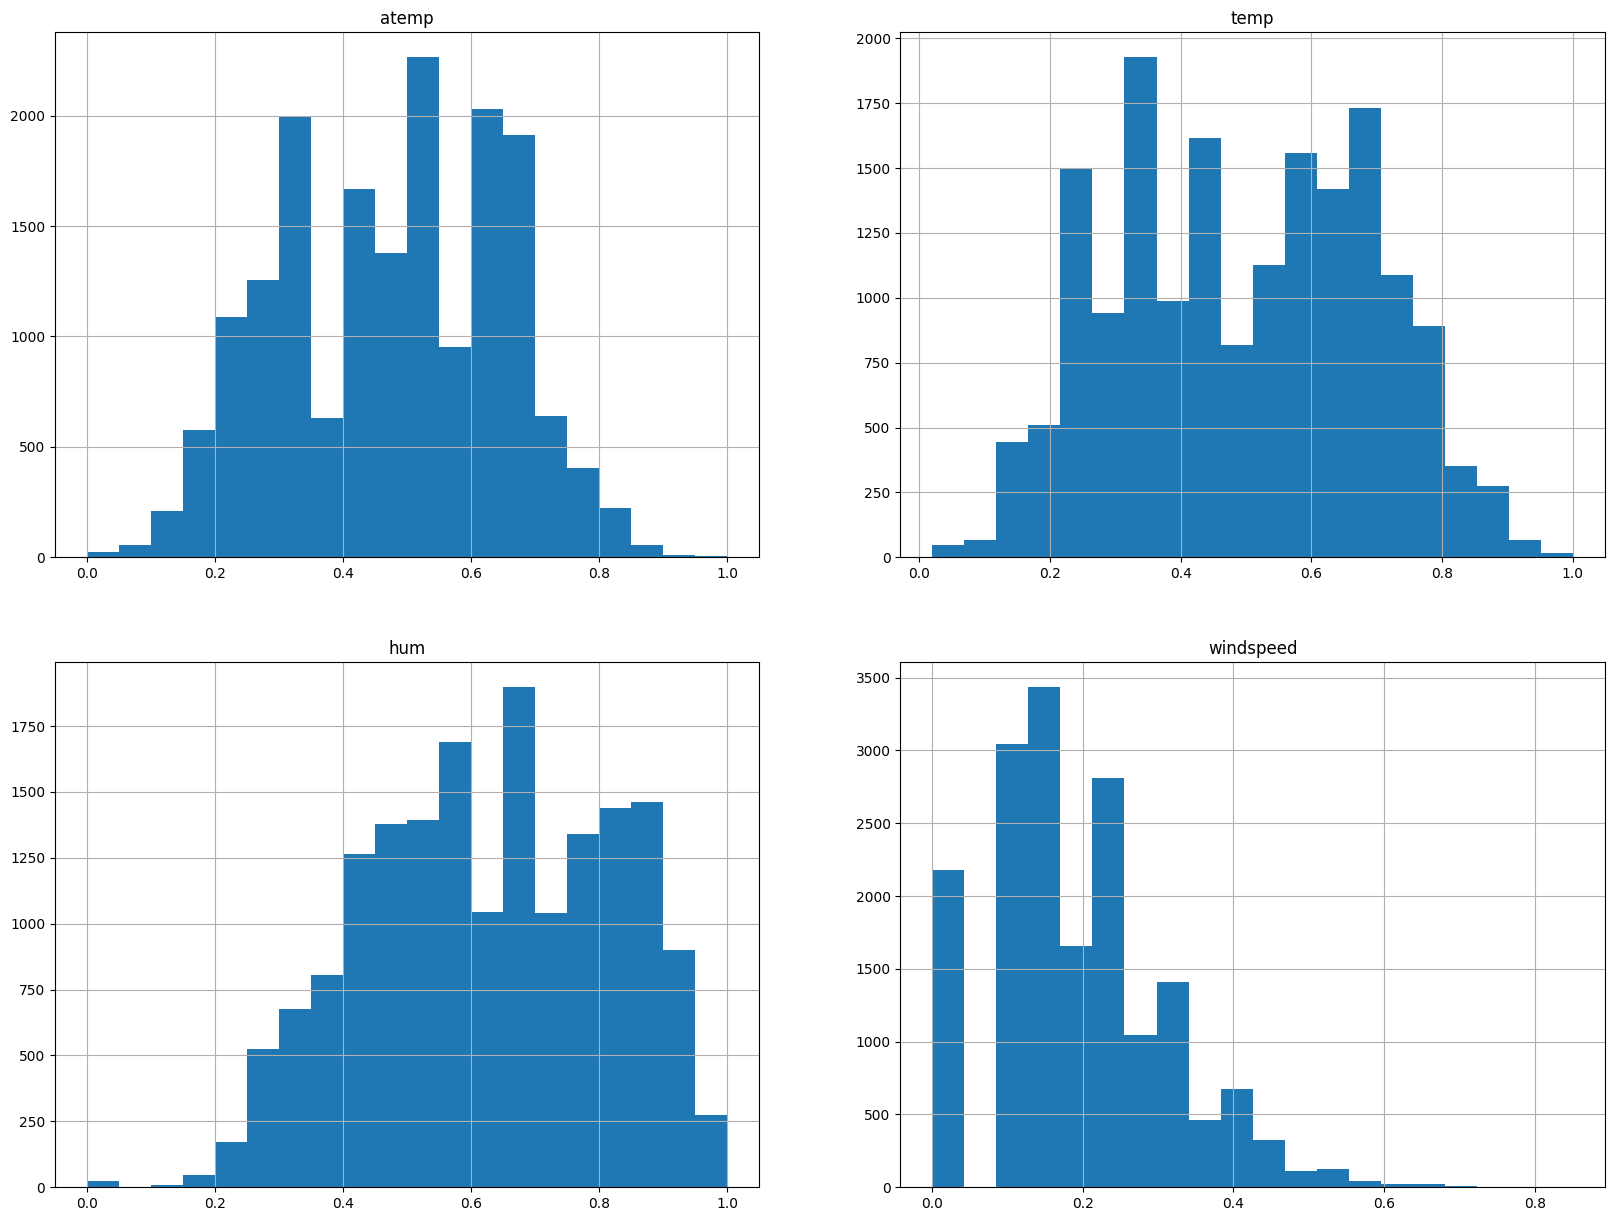

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for variable, subplot in zip(data_numerical, ax.flatten()):
    data_numerical[variable].hist(ax=subplot, bins=20)
    subplot.set_title(variable)

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

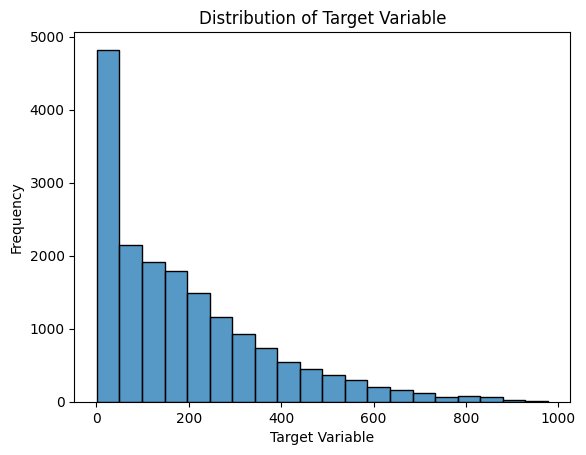

Coeficient: [0.01006461]
Intercept: 102.00163079471206


In [35]:
sns.histplot(data=dataset, x='cnt', bins=20)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

X = dataset[['index']]
y = dataset['cnt']
model = LinearRegression()
model.fit(X, y)
slope_coefficients = model.coef_
intercept = model.intercept_

print(f"Coeficient: {slope_coefficients}\nIntercept: {intercept}")

**Висновки з 8-10 завдання (детальні)**



1.   
2.   
3.  В 10 завданні розподіл близький до експоненціального з коефіцієнтом 0.01



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

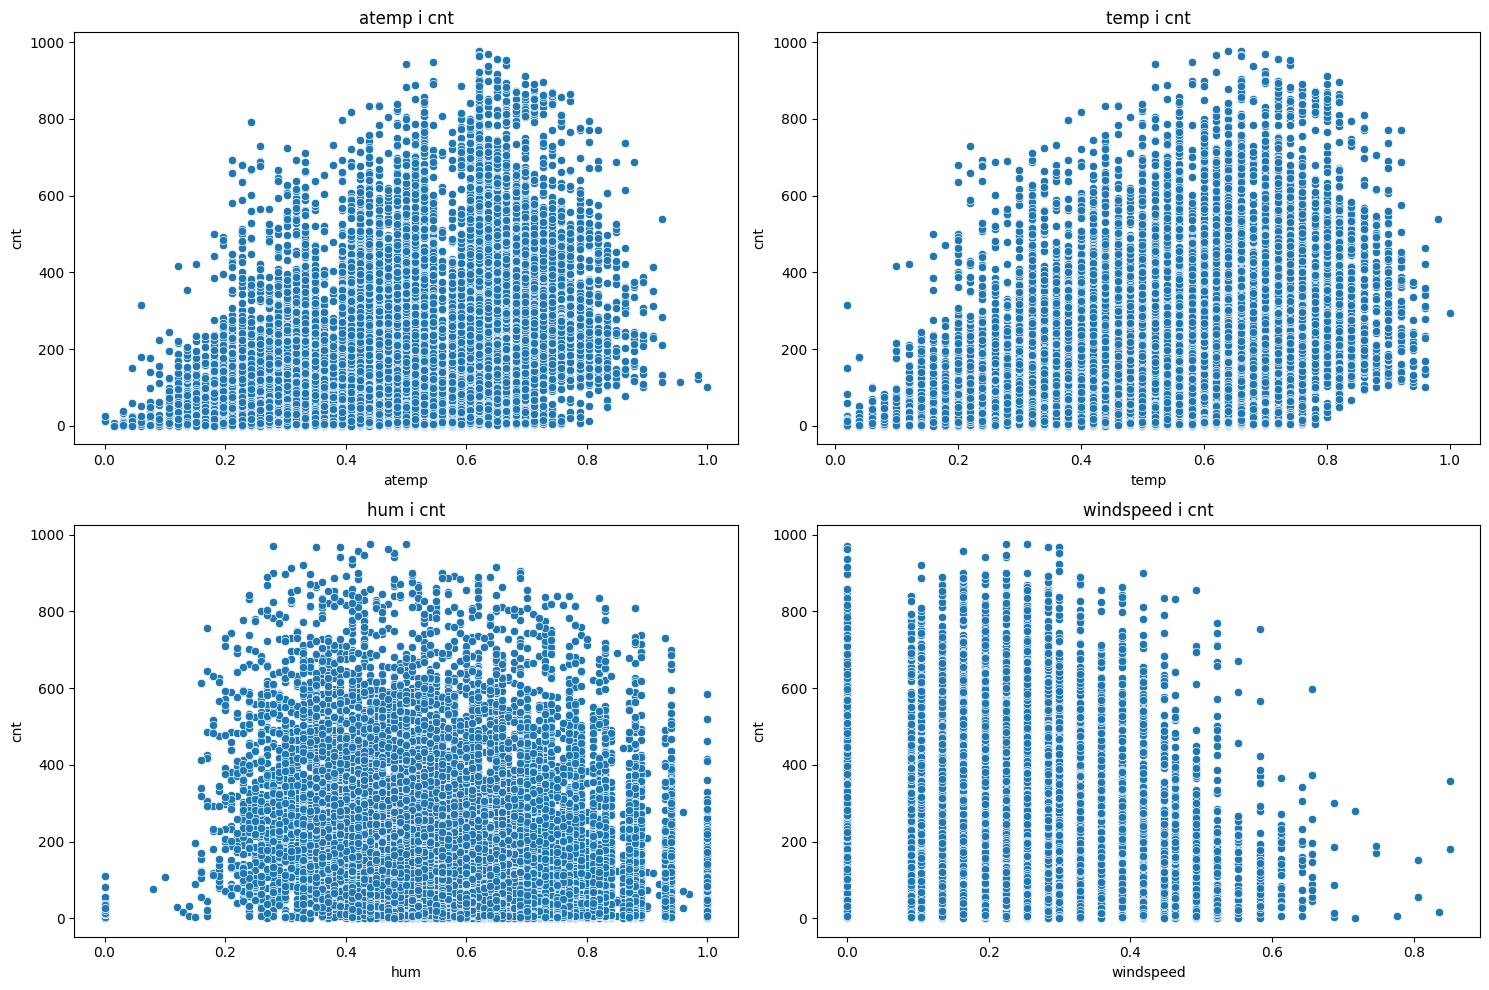

In [36]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(data=data_numerical, x=var, y='cnt', ax=subplot)
  subplot.set_title(f'{var} і cnt')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

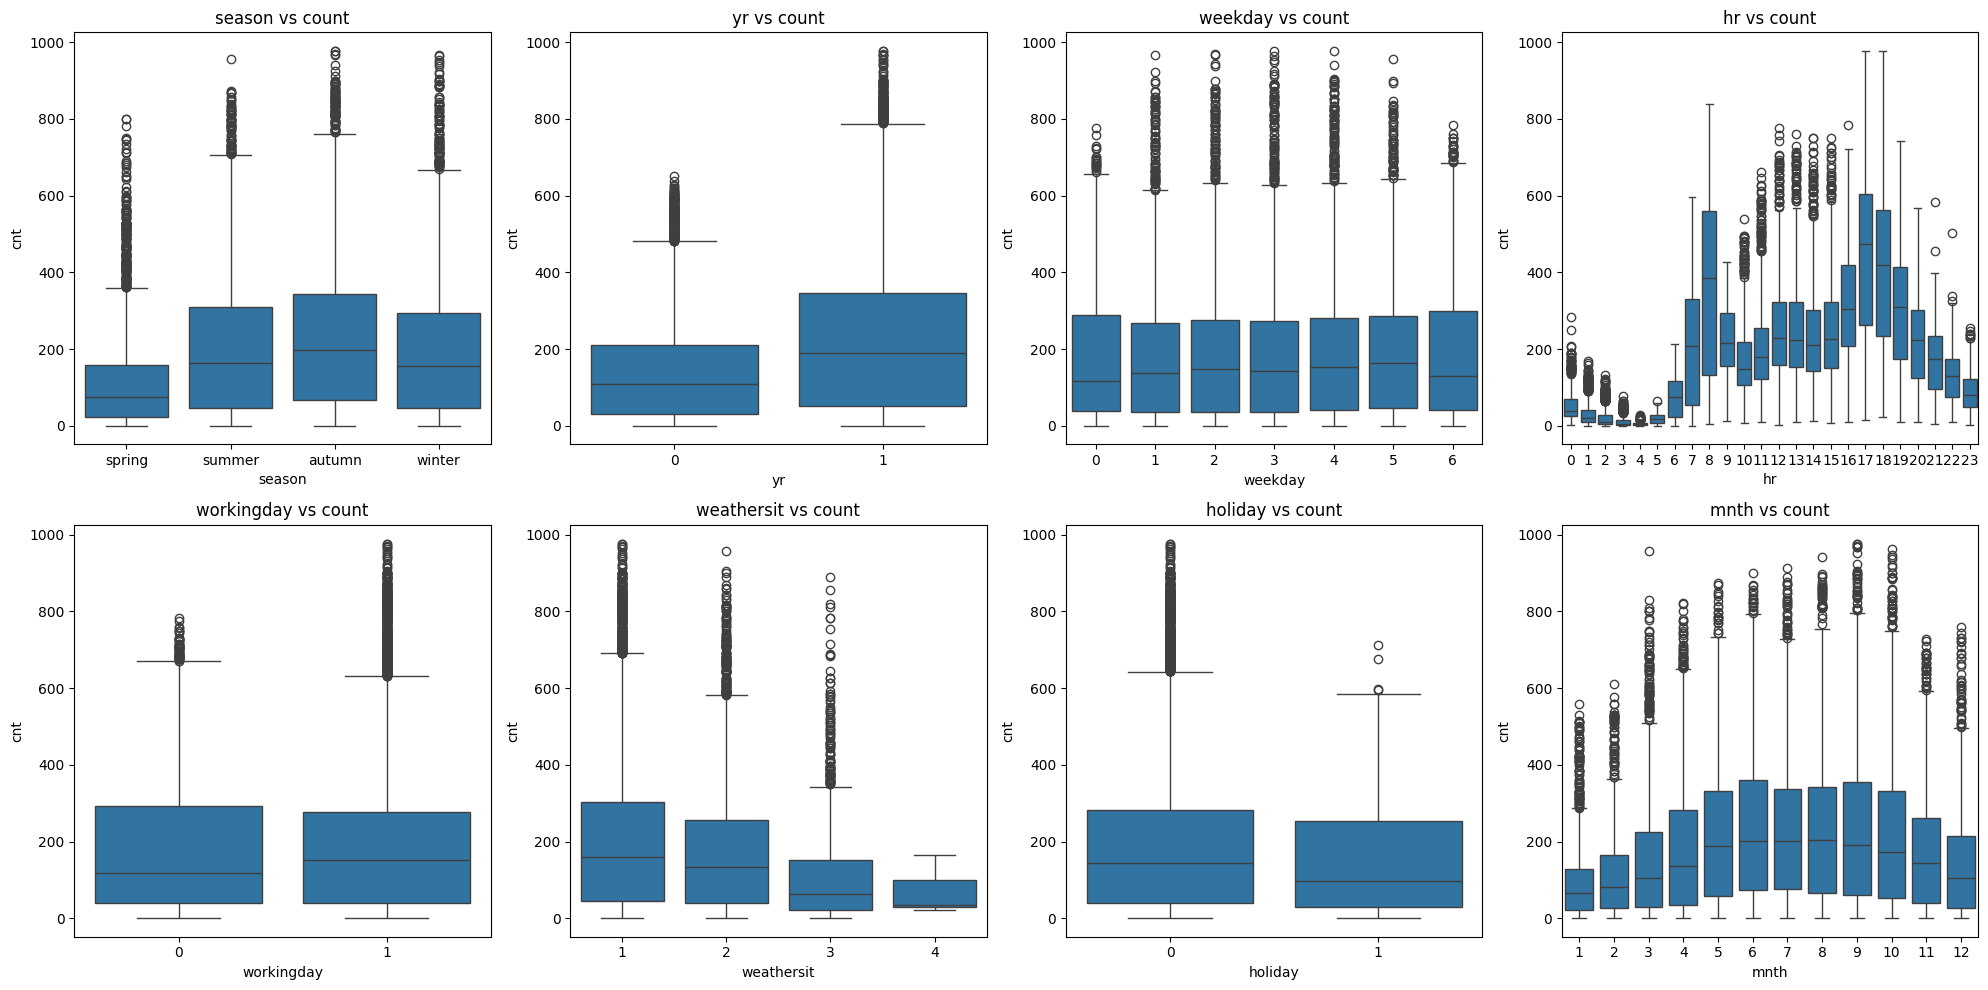

In [37]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x=data_categorical[var], y=data['cnt'], ax=subplot)
  subplot.set_title(f"{var} vs count")
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**

1. Весною найменша кількість максимальних дзвінків на день.
2. Піки кількості дзвінків зранку, та ввечері. Також висока кількість дзвінків з 12 години.
3. В понеділок та неділю найменша кількість дзвінків.
4. Чим гірша погода, тим менша кількість дзвінків, максимальна кількість 200
5. Чим більша швидкість вітру, принципі можна сказати, що менша кількість дзвінків.
6. Боксплоти показують, яка кількість дзвінків є високою для кожної категорії. На counterplot виглядало, що 600 дзвінків — це нормально, але боксплот показав, що часто.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

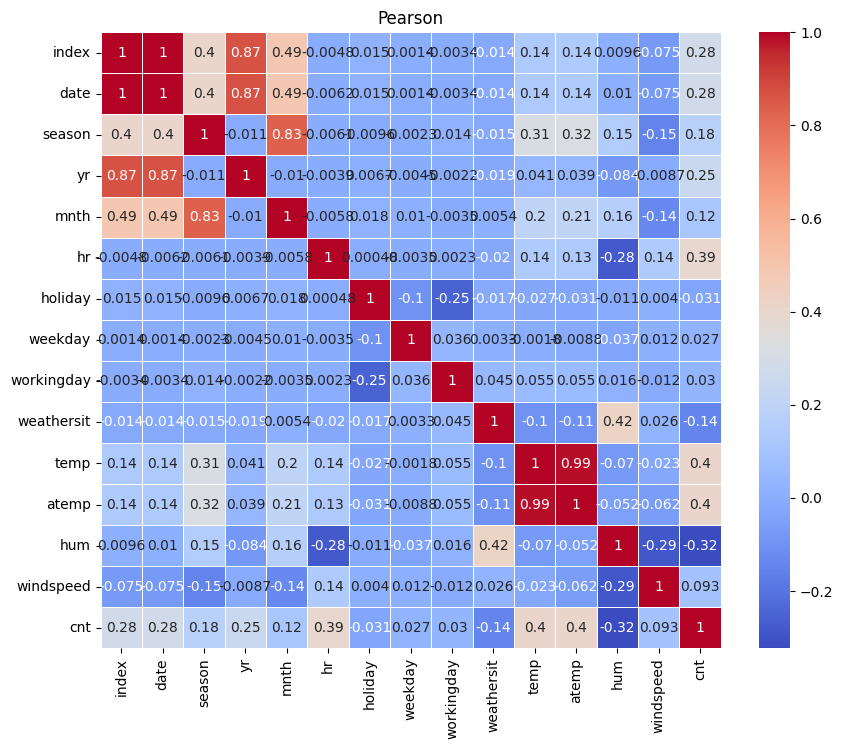

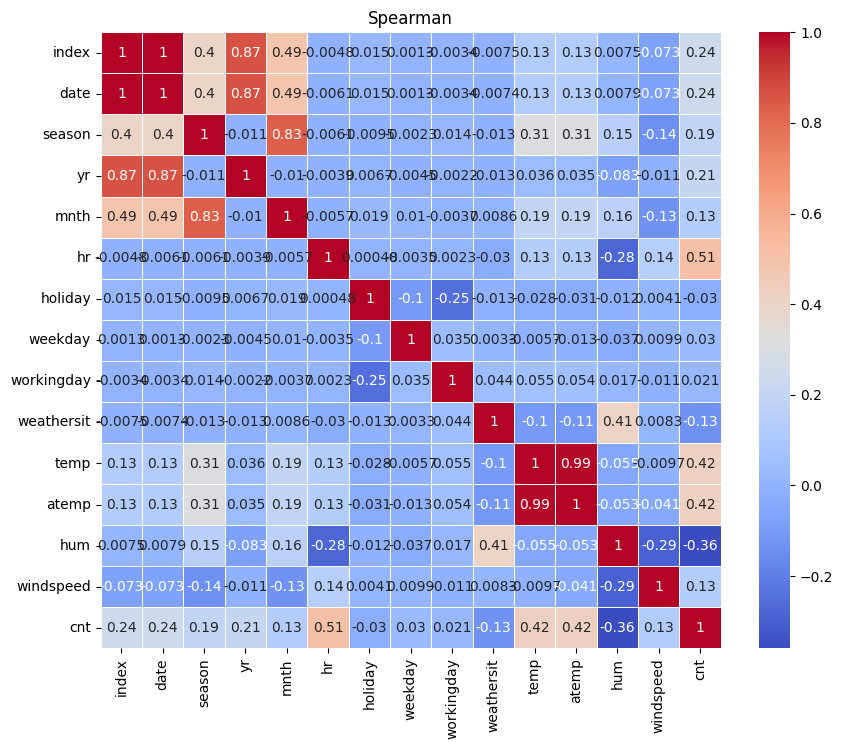

In [38]:
correlation_pearson = data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson")
plt.show()

correlation_spearman = data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Spearman")
plt.show()

Значення за методом Спірмана зазвичай або рівні, або більші за Пірсона. Це може бути чрез те що Спірман шукає монотонний зв'язок між змінними, а Пірсон — лінійний. Як би був хоч якийсь лінійний зв'язок, то зв'язок між змінними був би сильнішим, а коефіцієнт більшим.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [39]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                    pd.get_dummies(df['season'], prefix='season'),
                    pd.get_dummies(df['mnth'], prefix='mnth'),
                    pd.get_dummies(df['weekday'], prefix='weekday'),
                    pd.get_dummies(df['weathersit'], prefix='weathersit')
                          ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features



In [40]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [41]:
features['night_hours'] = dataset['hr'].apply(lambda x: 1 if (x >=0 and x<= 6) or (x>=20 and x<=23) else 0)


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [42]:
features_lr = features.drop(['season_0', 'mnth_4', 'weekday_0', 'weathersit_1','atemp', 'date'], axis = 1)

In [43]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(columns=[target])
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [44]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [45]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [46]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 14181.369, test: 13389.494
R^2 train: 0.576, test: 0.576


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

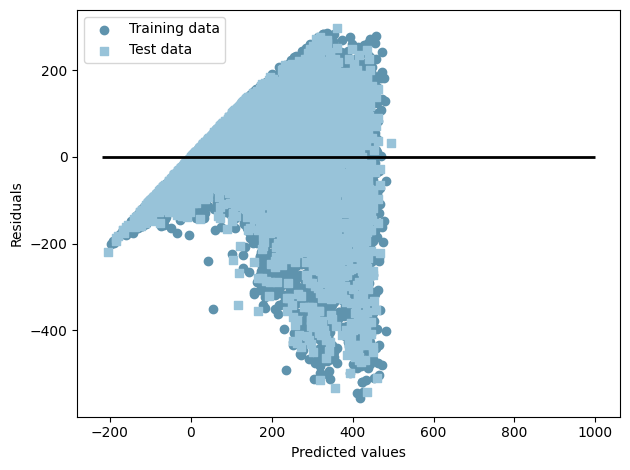

In [47]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1. Нелінійність. Залишки групуються та змінюють свій розкид залежно від прогнозованих значень, що натякає на відсутність лінійної залежності між змінними.
2. Бігато значень розташовані нижче 0 лінії, я вважаю це вказує на те, що модель недооцінює або переоцінює певні значення.
3. Тако ж на графіку видно деякі точки, які значно відрізняються від інших, це можуть бути аномальні значення, які  впливають на модель.